In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

# Загрузка данных
penguins = sns.load_dataset('penguins')
# Удаление строк с пропущенными значениями
penguins = penguins.dropna()
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [2]:
# Выбор признаков для кластеризации
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


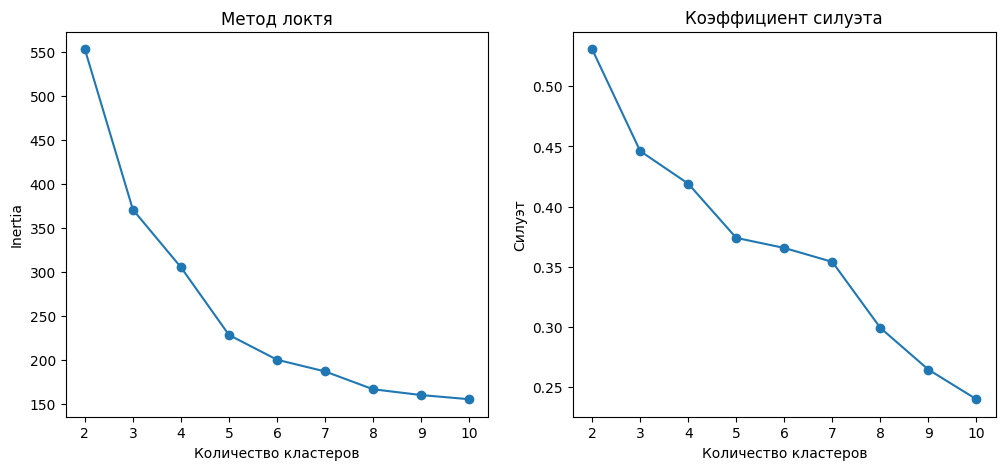

In [3]:
# Правило локтя
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Визуализация
plt.figure(figsize=(12, 5))

# График локтя
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')

# График коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')

plt.show()

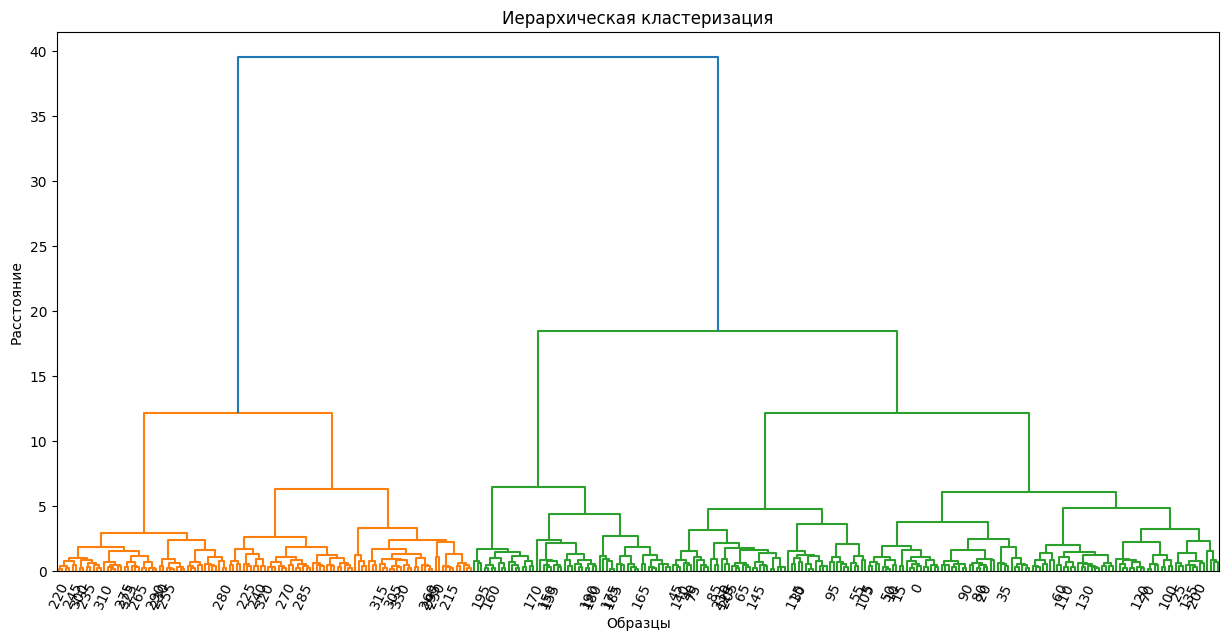

In [13]:
# Визуализация диаграммы с уменьшением количества меток
plt.figure(figsize=(15, 7))
dendrogram(Z, labels=[str(i) if i % 5 == 0 else '' for i in range(len(penguins))], leaf_rotation=65, leaf_font_size=10)
plt.title('Иерархическая кластеризация')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()


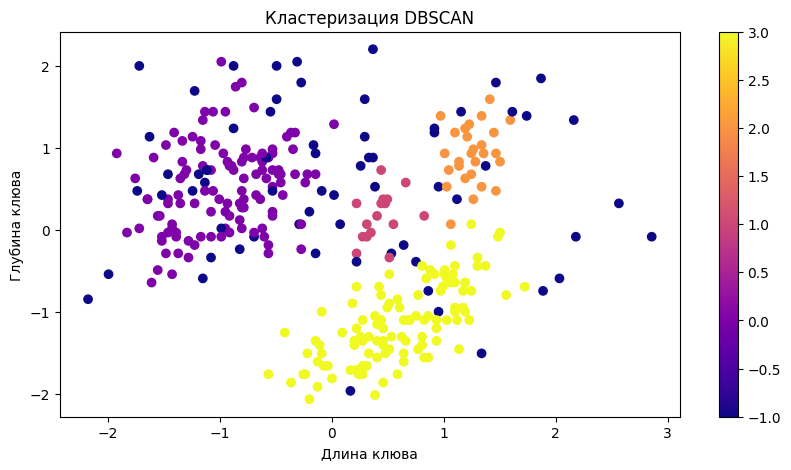

In [14]:
# Кластеризация DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Визуализация кластеров
plt.figure(figsize=(10, 5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('Кластеризация DBSCAN')
plt.xlabel('Длина клюва')
plt.ylabel('Глубина клюва')
plt.colorbar()
plt.show()


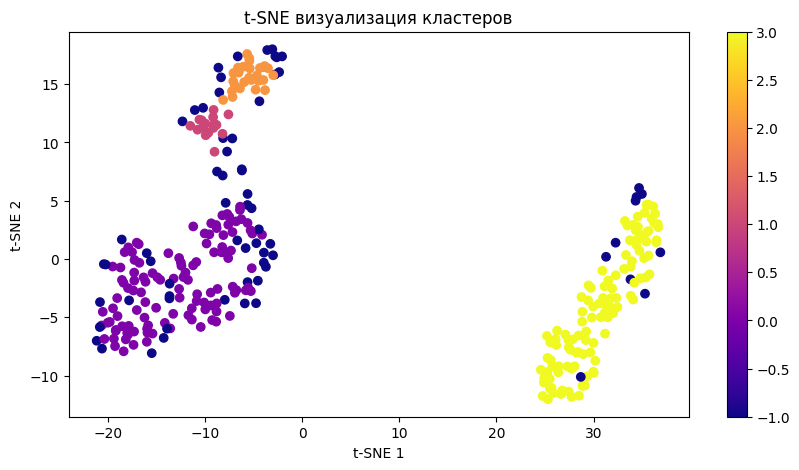

In [6]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('t-SNE визуализация кластеров')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()